## Configure o NVIDIA-SMI

Vamos garantir que você tenha acesso à GPU. Podemos usar o comando `nvidia-smi` para fazer isso. Em caso de qualquer problema, vá para `Editar` -> `Configurações do notebook` -> `Acelerador de hardware`, defina para `GPU` e clique em `Salvar`.

In [1]:
!nvidia-smi

Wed Nov 15 19:04:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Instalar o YOLOv8

⚠️ O YOLOv8 ainda está em desenvolvimento intenso. Mudanças significativas estão sendo introduzidas quase semanalmente. Nos esforçamos para garantir que nossos notebooks do YOLOv8 funcionem com a versão mais recente da biblioteca. Os últimos testes foram realizados em **27.01.2023** com a versão **YOLOv8.0.20**.

Se você perceber que nosso notebook se comporta incorretamente - especialmente se encontrar erros que o impeçam de seguir o tutorial - não hesite! Avise-nos e abra uma [issue](https://github.com/roboflow/notebooks/issues) no repositório de Notebooks Roboflow.

O YOLOv8 pode ser instalado de duas maneiras - a partir do código-fonte e via pip. Isso ocorre porque esta é a primeira iteração do YOLO a ter um pacote oficial.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.8/78.2 GB disk)


In [67]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

Se você deseja treinar, validar ou realizar inferência em modelos e não precisa fazer nenhuma modificação no código, o uso da interface de linha de comando (CLI) do YOLO é a maneira mais fácil de começar. Leia mais sobre a CLI no  [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://media.roboflow.com/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




---

### Load Dataset on Roboflow

In [2]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna
    Found existing

In [35]:
!rm -rf *

In [40]:
from roboflow import Roboflow
import os, shutil

class LoadDataset(object):

  def __init__(self, api_key, workspace, project):
    self.api_key = api_key
    self.workspace = workspace
    self.project = project

  def load(self):
    self.rf = Roboflow(api_key=self.api_key) # "njpOAhAY7E8myjQ2Ybq4"
    self.project_instance = self.rf.workspace(self.workspace).project(self.project)
    self.project_instance.version(2).download("yolov8")

class FolderChange(object):

  @staticmethod
  def create_folder_dataset():
    os.mkdir("datasets")

  @staticmethod
  def move_folder(target, folder):
    target_path = os.path.join(os.getcwd(), target, folder)
    shutil.move(folder, target_path)




In [26]:
api_key = "njpOAhAY7E8myjQ2Ybq4"
workspace = "marinhocorp"
project = "petwatch-dataset"

In [37]:
dataset = LoadDataset(api_key, workspace, project)

In [38]:
dataset.load()

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.210, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to petwatch-dataset-2 in yolov8:: 100%|██████████| 411/411 [00:00<00:00, 6326.18it/s]


In [41]:
FolderChange.create_folder_dataset()

In [42]:
FolderChange.move_folder("datasets","petwatch-dataset-2")

## Custom Training

In [ ]:
!pip install ultralytics

In [88]:
import yaml

class Model(object):
    def __init__(self, pretrained_model='yolov8s.pt', data_yaml_path='data.yaml'):
        # Load a model
        self.model = YOLO(pretrained_model)  # load a pretrained model (recommended for training)
        self.data_yaml_path = data_yaml_path

    def update_data_yaml(self):
        # Load existing data.yaml
        with open(self.data_yaml_path, 'r') as file:
            data_yaml = yaml.safe_load(file)

        # Update or add the 'path' field
        data_yaml['path'] = '../datasets/'

        # Save the updated data.yaml
        with open(self.data_yaml_path, 'w') as file:
            yaml.dump(data_yaml, file, default_flow_style=False)

    def fit(self, data, epochs=25, imgsz=800, plots=True):
        self.model.train(data=data, epochs=epochs, imgsz=imgsz, plots=plots)

    def get_model(self):
        return self.model

class EvaluateModel(object):
    def __init__(self, model):
        self.model = model

    def get_metrics(self):
        self.model.val(plots=True)

    def get_confusion_matrix(self, folder_path):
        return Image(filename=f'{folder_path}/confusion_matrix.png', width=600)

    def get_results(self, folder_path):
        return Image(filename=f'{folder_path}/results.png', width=600)

    def get_batch(self, folder_path):
        return Image(filename=f"{folder_path}/val_batch1_pred.jpg", width=600)
# Exemplo de uso
# model = Model()
# model.update_data_yaml()


In [ ]:
# Train the model
data = "/content/datasets/petwatch-dataset-2/data.yaml"
model = Model(pretrained_model="yolov8s.pt", data_yaml_path=data)

model.fit(data=data, epochs=25, imgsz=800, plots=True)


## Validate Custom Model

In [92]:
evaluate = EvaluateModel(model.get_model())

evaluate.get_metrics()

Ultralytics YOLOv8.0.210 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning /content/datasets/petwatch-dataset-2/valid/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]
                   all         40         42      0.997      0.957      0.958      0.822
                  lora         40         23      0.997      0.913      0.921        0.8
                   uly         40         19      0.996          1      0.995      0.845
Speed: 0.5ms preprocess, 15.6ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to runs/detect/train64


In [ ]:
evaluate.get_confusion_matrix("/content/runs/detect/train62")

In [34]:
evaluate.get_results("/content/runs/detect/train6")

In [ ]:
evaluate.get_batch("/content/runs/detect/train6")

## Inference with Custom Model

In [94]:

from ultralytics import YOLO

# Load a pretrained YOLOv8n model
class LoadModel(object):
  def __init__(self, model_path): # '/content/runs/detect/train/weights/best.pt'
      self.model = YOLO(model_path)

  def inference(self, image, save, imgsz, conf): #
      return self.model.predict(image, save=save, imgsz=imgsz, conf=conf)



In [96]:
model_inference = LoadModel('/content/runs/detect/train5/weights/best.pt')
image = '/content/datasets/petwatch-dataset-2/test/images/cat_1330_jpg.rf.6ff0d264785ebb61ab0f08ae2ea7feef.jpg'
model_inference.inference(image, save=True, imgsz=800, conf=0.5)


image 1/1 /content/datasets/petwatch-dataset-2/test/images/cat_1330_jpg.rf.6ff0d264785ebb61ab0f08ae2ea7feef.jpg: 800x800 1 uly, 24.9ms
Speed: 5.2ms preprocess, 24.9ms inference, 3.3ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'lora', 1: 'uly'}
 orig_img: array([[[115, 153, 158],
         [116, 154, 159],
         [116, 154, 159],
         ...,
         [ 91, 133, 140],
         [ 92, 134, 141],
         [ 92, 134, 141]],
 
        [[115, 153, 158],
         [116, 154, 159],
         [116, 154, 159],
         ...,
         [ 89, 131, 138],
         [ 89, 131, 138],
         [ 90, 132, 139]],
 
        [[115, 153, 158],
         [115, 153, 158],
         [116, 154, 159],
         ...,
         [ 89, 131, 138],
         [ 89, 131, 138],
         [ 89, 131, 138]],
 
        ...,
 
        [[204, 201, 217],
         [204, 201, 217],
         [203, 200, 216],
         ...,
         [ 35,  26,  16],
         [ 35,  26,  16],
         [ 36,  27,  17]],
 
        [[206, 199, 206],
         [206, 200, 205],
         [205, 199, 204],
         ...,
         [ 33,  27,  

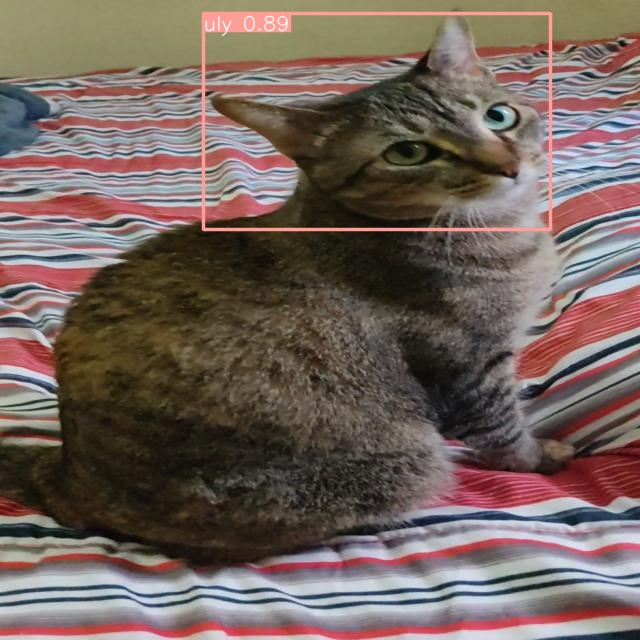

In [98]:

Image(filename=f'/content/runs/detect/predict/cat_1330_jpg.rf.6ff0d264785ebb61ab0f08ae2ea7feef.jpg', width=600)

**NOTE:** Let's take a look at few results.

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.